In [42]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat


In [43]:
data=pd.read_csv("SaYoPillow.csv")

data.head()
data.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)



In [44]:
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [45]:
x = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1]).reshape(len(y),1)
print(x.shape)
print(y.shape)


(630, 8)
(630, 1)


In [46]:
# Add sigmoid FUNCTION from the previous lab
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    #gz=np.divide(1,1 + np.exp(-z))
    gz=1/(1+np.exp(-z))
    return gz

In [47]:


# Add costFunctionReg FUNCTION from the previous lab (the function that computes the regularized cost and the gradients)
def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m=len(y)
        
    #vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X,theta))
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function L2 norm
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all



In [48]:

# Add gradientDescent FUNCTION from the previous lab (the function that returns the optimal theta vector and J_history)
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    for i in range(num_iters):
        
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    for i in range(num_iters):
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X,y,theta,Lambda)
        
        #update theta
        theta = theta-alpha*grad
        
        J_history.append(cost)
    
    return theta , J_history



In [49]:



def oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, K):
    """
    Inputs:
    numpy array of data X and labels y
    initial_theta - inicialized vector of model parameters theta 
    alpha - learning rate
    num_iters - number of iterations
    Lambda - regularization parameter 
    K -number of classes
    
    ONEVSALL trains K Logistic Regression classifiers using gradient descent. 
    
    Returns:   
    all_theta - Kxn matrix where i-th row corresponds to the i-th classifier, n parameters
    all_J - the evolution of cost function during each iteration (J_history) for all K classifiers
    
    """
    all_theta = []
    all_J=[]
    
    #number of training examples
    m=len(y)
    
    #number of features
    n=X.shape[1]
    
    # add an extra column of 1´s corresponding to xo=1 (aka intercept term)
    X=np.append(np.ones((m,1)),X,axis=1)
    
    for i in range(1,K+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,alpha,num_iters,Lambda)
        
        # sdd the vector of optimized parameters theta of classifier i
        all_theta.extend(theta)
                
        # add the cost function history of classifier i
        all_J.extend(J_history)
        
    return np.array(all_theta).reshape(K,n+1), all_J




In [57]:
#Inicialize vector theta =0
initial_theta = np.zeros((x.shape[1]+1,1))

#Optimization hyper-parameters 
alpha=1 #learning rate
num_iters=300
Lambda=0.1
all_theta, all_J = oneVsAll(x, y, initial_theta, alpha, num_iters, Lambda, 10)
print(np.size(all_theta))
print(all_theta.shape)

/tmp/ipykernel_23710/281972933.py:8: RuntimeWarning: overflow encountered in exp
  gz=1/(1+np.exp(-z))
/tmp/ipykernel_23710/3296616311.py:14: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
/tmp/ipykernel_23710/3296616311.py:14: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))


90
(10, 9)


Text(0.5, 1.0, 'Cost function using Gradient Descent')

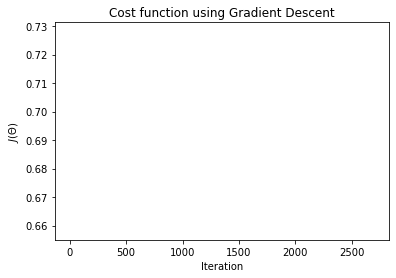

In [58]:


#print(all_J)
plt.plot(all_J)  #All classifiers
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

